## Waterfall graphic template

In [4]:
import pandas as pd
from IPython.display import display
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from plotnine import *

df= pd.read_excel('waterfall.xlsx', sheet_name='Sheet4')

#not necessary if columns are correct
df.columns = df.iloc[0]
df = df.drop([df.index[0]])

blank=df.amount.cumsum().shift(1).fillna(0)

total = df.sum().amount
df.loc["net"] = total
blank.loc["net"] = total

step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

blank.loc["net"] = 0

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_24906/1869737306.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


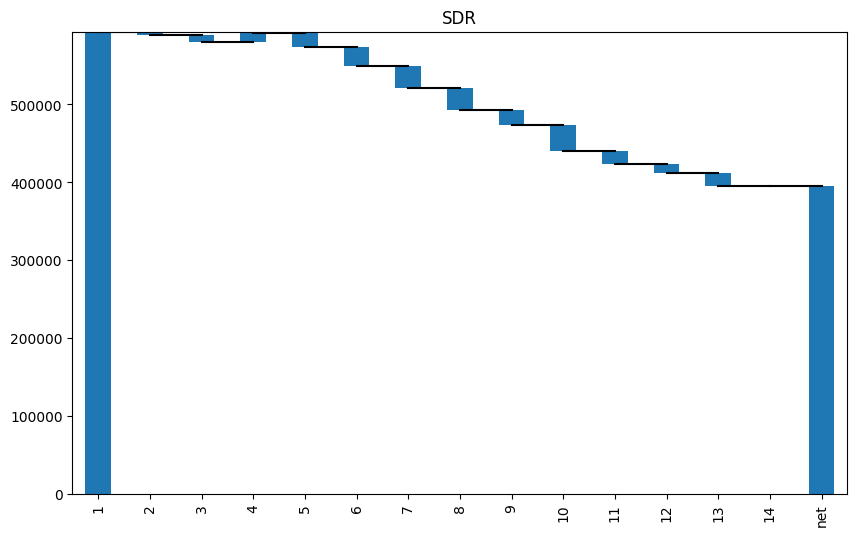

In [7]:
my_plot = df.plot(kind='bar', stacked=True, bottom=blank,legend=None, title="SDR", figsize=(10,6))
my_plot.plot(step.index, step.values,'k')
my_plot.get_figure().savefig("waterfall.svg",format='svg',dpi=200,bbox_inches='tight')

In [ ]:
# #Use python 2.7+ syntax to format currency
# def money(x, pos):
#     'The two args are the value and tick position'
#     return "${:,.0f}".format(x)
# formatter = FuncFormatter(money)

# #Data to plot. Do not include a total, it will be calculated
# index = ['sales','returns','credit fees','rebates','late charges','shipping']
# data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}

# #Store data and create a blank series to use for the waterfall
# trans = pd.DataFrame(data=data,index=index)
# blank = trans.amount.cumsum().shift(1).fillna(0)

# #Get the net total number for the final element in the waterfall
# total = trans.sum().amount
# trans.loc["net"]= total
# blank.loc["net"] = total

# #The steps graphically show the levels as well as used for label placement
# step = blank.reset_index(drop=True).repeat(3).shift(-1)
# step[1::3] = np.nan

# #When plotting the last element, we want to show the full bar,
# #Set the blank to 0
# blank.loc["net"] = 0

# #Plot and label
# my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title="2014 Sales Waterfall")
# my_plot.plot(step.index, step.values,'k')
# my_plot.set_xlabel("Transaction Types")

# #Format the axis for dollars
# my_plot.yaxis.set_major_formatter(formatter)

# #Get the y-axis position for the labels
# y_height = trans.amount.cumsum().shift(1).fillna(0)

# #Get an offset so labels don't sit right on top of the bar
# max = trans.max()
# neg_offset = max / 25
# pos_offset = max / 50
# plot_offset = int(max / 15)

# #Start label loop
# loop = 0
# for index, row in trans.iterrows():
#     # For the last item in the list, we don't want to double count
#     if row['amount'] == total:
#         y = y_height[loop]
#     else:
#         y = y_height[loop] + row['amount']
#     # Determine if we want a neg or pos offset
#     if row['amount'] > 0:
#         y += pos_offset
#     else:
#         y -= neg_offset
#     my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
#     loop+=1

# #Scale up the y axis so there is room for the labels
# my_plot.set_ylim(0,blank.max()+int(plot_offset))
# #Rotate the labels
# my_plot.set_xticklabels(trans.index,rotation=0)
# my_plot.get_figure().savefig("waterfall.svg",dpi=200,bbox_inches='tight')